# Tutorial: Understanding Regression Error Metrics in Python

In [2]:
# basic imports
import pandas as pd
import numpy as np
from IPython.display import Image
from matplotlib import pyplot as plt

# linear regresion imports
from sklearn.linear_model import LinearRegression

# metrics imports
from sklearn import metrics

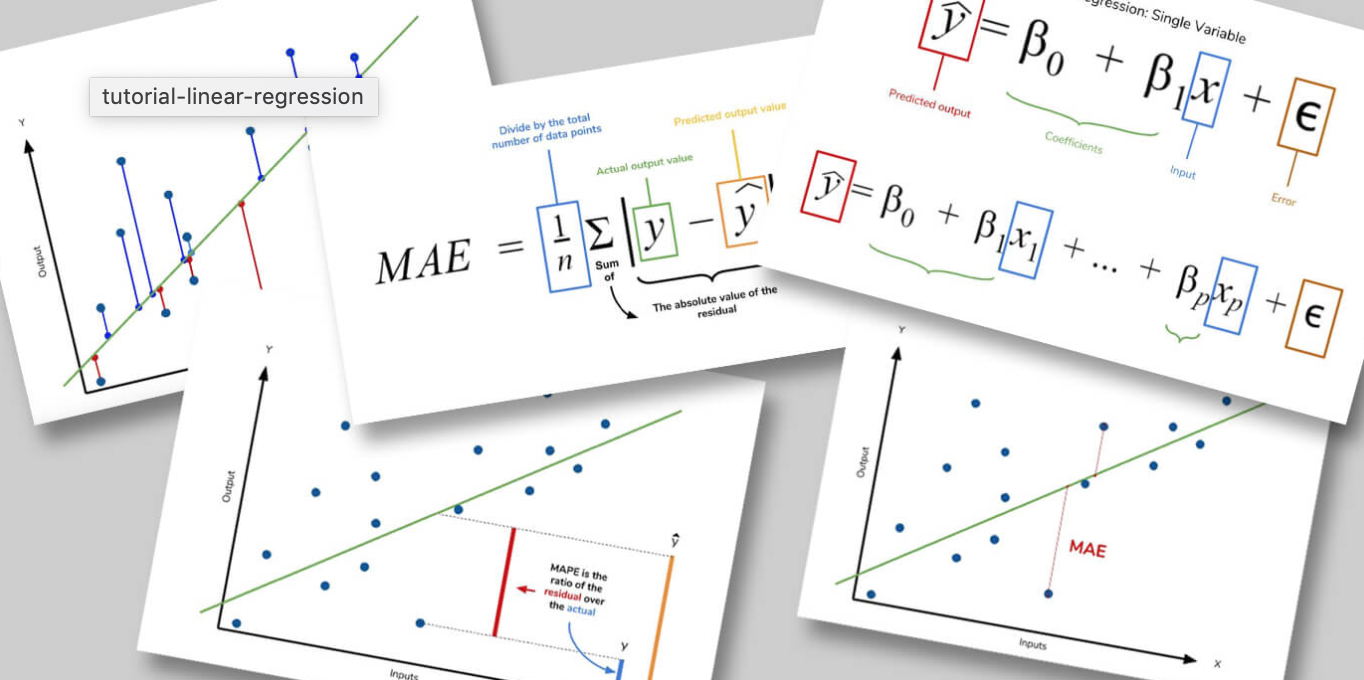

In [13]:
Image(filename='img/pic1.png', width= 900, height=400)

https://www.dataquest.io/blog/understanding-regression-error-metrics/

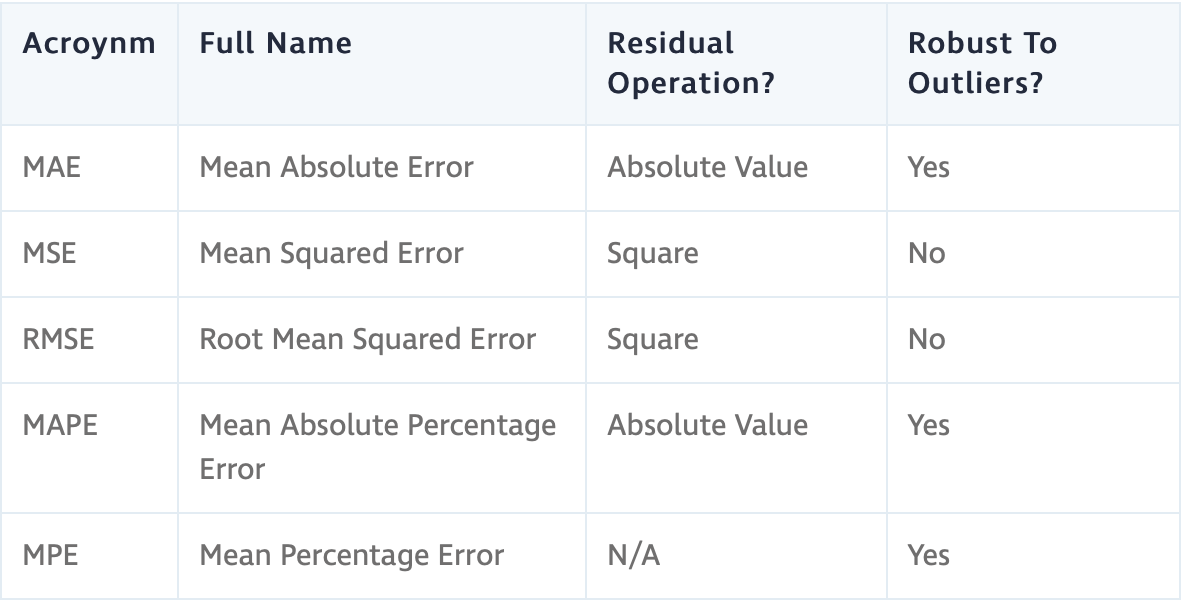

In [17]:
Image(filename='img/pic3.png', width= 600, height=250)

In [4]:
y_test = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

# MAE (mean absolute error)

The mean absolute error (MAE) is the simplest regression error metric to understand. We’ll calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out.

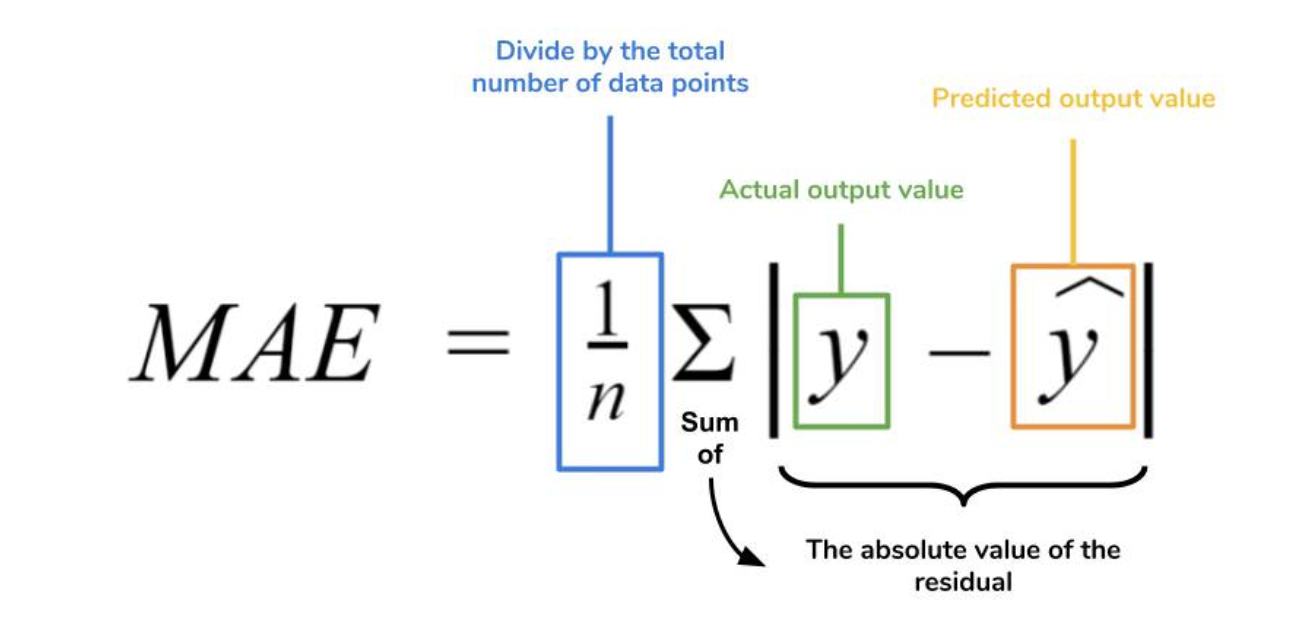

In [19]:
Image(filename='img/pic2.png', width= 600, height=250)

The MAE is also the most intuitive of the metrics since we’re just looking at the absolute difference between the data and the model’s predictions. Because we use the absolute value of the residual, the MAE does not indicate underperformance or overperformance of the model

INTERPRETATION:
A small MAE suggests the model is great at prediction, while a large MAE suggests that your model may have trouble in certain areas.

METRICS WEAKNESS
While the MAE is easily interpretable, using the absolute value of the residual often is not as desirable as squaring this difference. Depending on how you want your model to treat outliers, or extreme values, in your data, you may want to bring more attention to these outliers or downplay them. The issue of outliers can play a major role in which error metric you use.

In [6]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 0.5


# MSE (mean square error)

The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

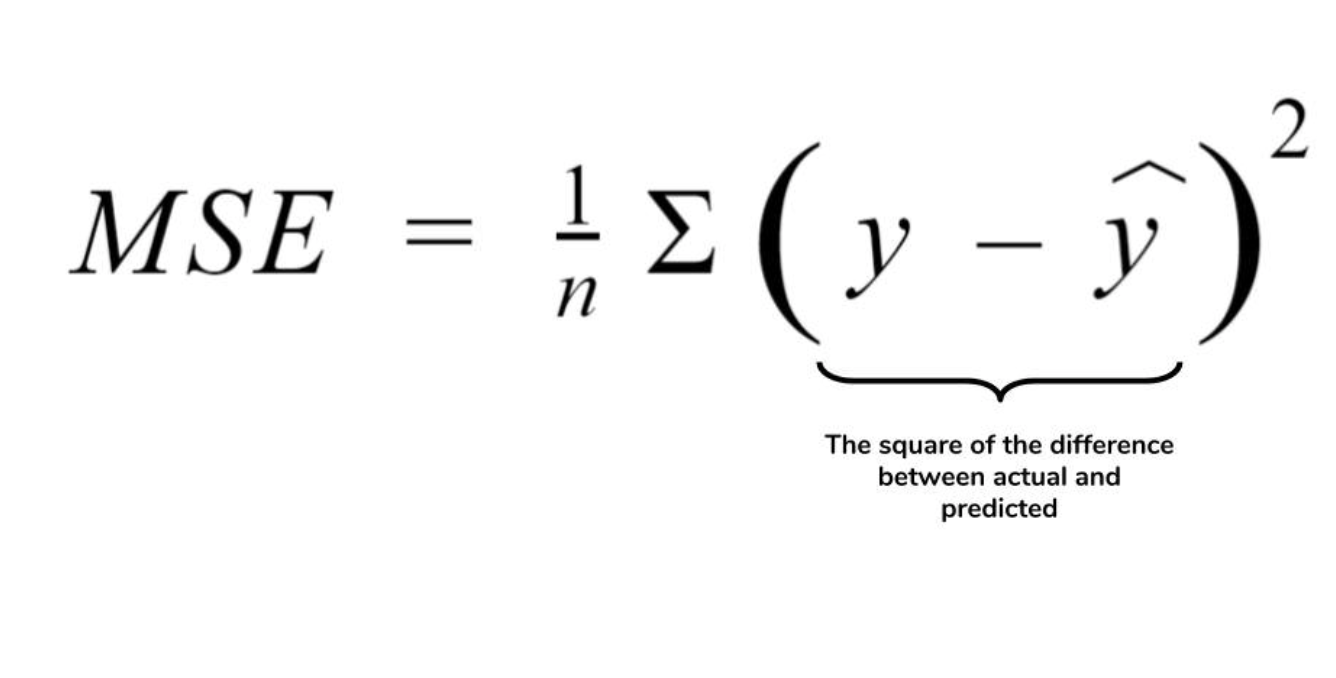

In [20]:
Image(filename='img/pic4.png', width= 600, height=200)

Because we are squaring the difference, the MSE will almost always be bigger than the MAE. For this reason, we cannot directly compare the MAE to the MSE. We can only compare our model’s error metrics to those of a competing model.

 While each residual in MAE contributes proportionally to the total error, the error grows quadratically in MSE. This ultimately means that outliers in our data will contribute to much higher total error in the MSE than they would the MAE.

# The problem of outliers

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

Outliers in our data are a constant source of discussion for the data scientists that try to create models. Do we include the outliers in our model creation or do we ignore them? The answer to this question is dependent on the field of study, the data set on hand and the consequences of having errors in the first place.

In [8]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.375


# RMSE (root mean squared error) 

1) As the name suggests, it is the square root of the MSE. Because the MSE is squared, its units do not match that of the original output. 
2) Researchers will often use RMSE to convert the error metric back into similar units, making interpretation easier. Since the MSE and RMSE both square the residual, they are similarly affected by outliers. 
3) The RMSE is analogous to the standard deviation (MSE to variance) and is a measure of how large your residuals are spread out. 
4) Both MAE and MSE can range from 0 to positive infinity, so as both of these measures get higher, it becomes harder to interpret how well your model is performing. Another way we can summarize our collection of residuals is by using percentages so that each prediction is scaled against the value it’s supposed to estimate.

In [9]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.6123724356957945


# MAPE (the mean absolute percentage error)

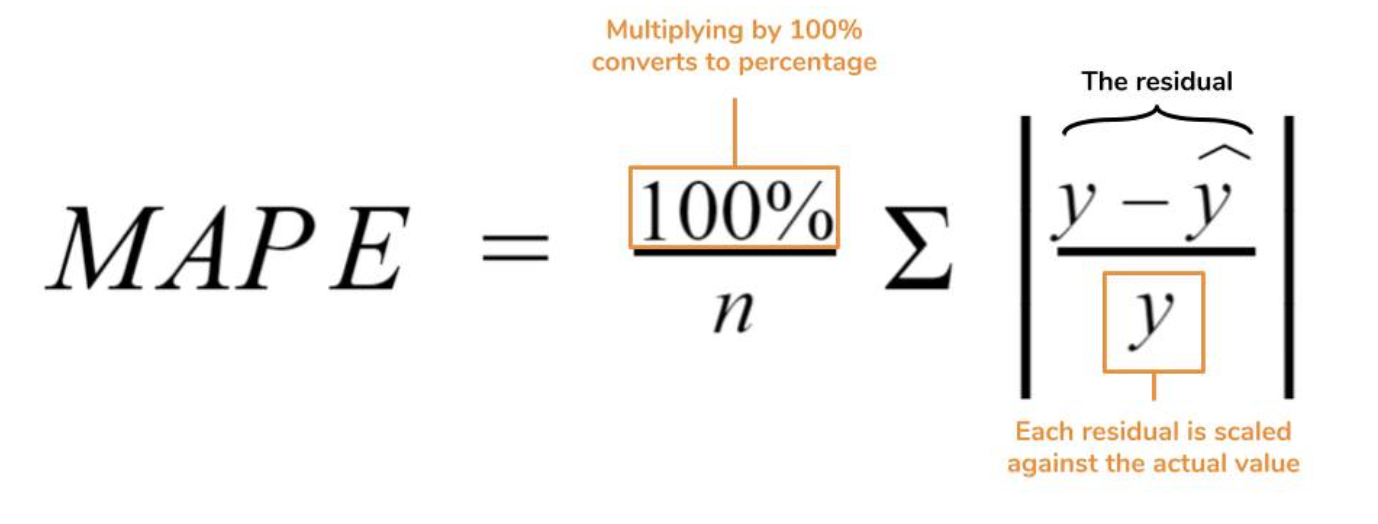

In [21]:
Image(filename='img/pic6.png', width= 600, height=200)

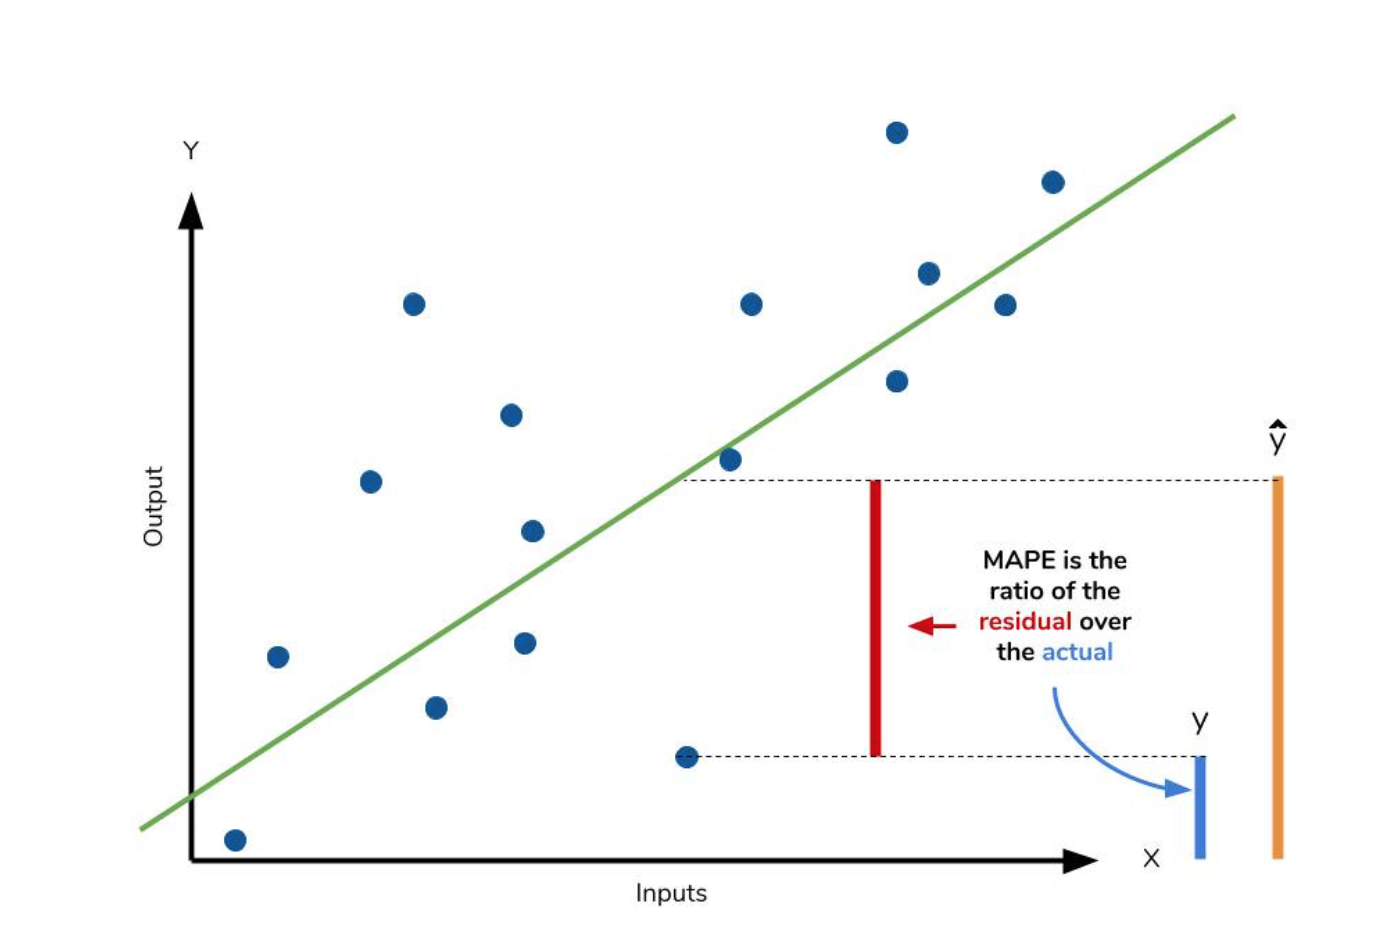

In [22]:
Image(filename='img/pic7.png', width= 600, height=250)

The mean absolute percentage error (MAPE) is the percentage equivalent of MAE. The equation looks just like that of MAE, but with adjustments to convert everything into percentages. 

MAPE advantage:

1) Just as MAE is the average magnitude of error produced by your model, the MAPE is how far the model’s predictions are off from their corresponding outputs on average.
2) Like MAE, MAPE also has a clear interpretation since percentages are easier for people to conceptualize.
3) Both MAPE and MAE are robust to the effects of outliers thanks to the use of absolute value. 

MAPE limitations:

1) Many of MAPE’s weaknesses actually stem from use division operation. 
2) Now that we have to scale everything by the actual value, MAPE is undefined for data points where the value is 0. 3) Similarly, the MAPE can grow unexpectedly large if the actual values are exceptionally small themselves. Finally, the MAPE is biased towards predictions that are systematically less than the actual values themselves.
4) That is to say, MAPE will be lower when the prediction is lower than the actual compared to a prediction that is higher by the same amount. The quick calculation below demonstrates this point.

# MPE (the mean percentage error)

The mean percentage error (MPE) equation is exactly like that of MAPE. The only difference is that it lacks the absolute value operation.

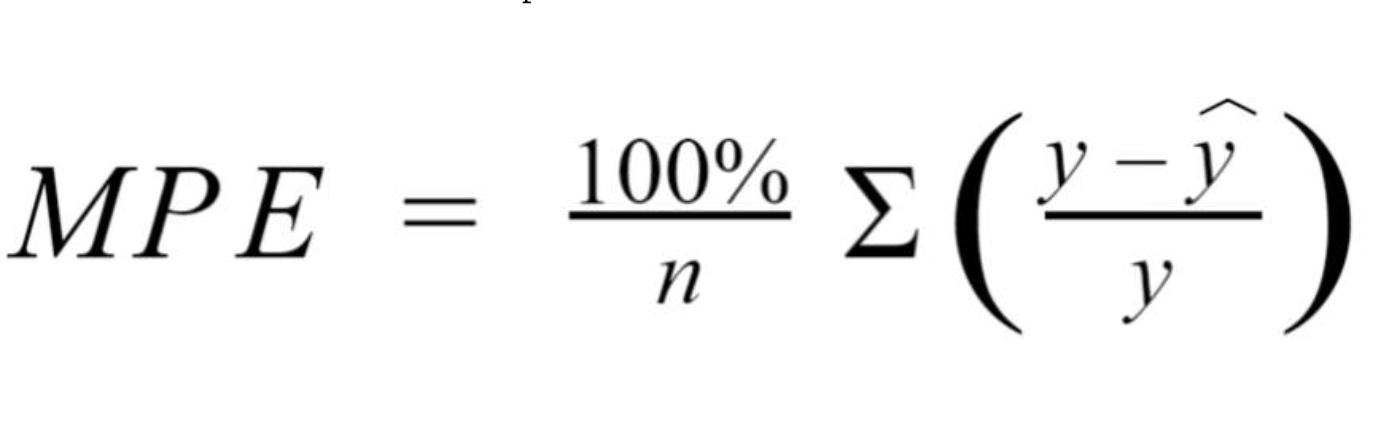

In [23]:
Image(filename='img/pic8.png', width= 600, height=200)


1) Even though the MPE lacks the absolute value operation, it is actually its absence that makes MPE useful.
2) Since positive and negative errors will cancel out, we cannot make any statements about how well the model predictions perform overall.
3) However, if there are more negative or positive errors, this bias will show up in the MPE. Unlike MAE and MAPE, MPE is useful to us because it allows us to see if our model systematically underestimates (more negative error) or overestimates (positive error). 

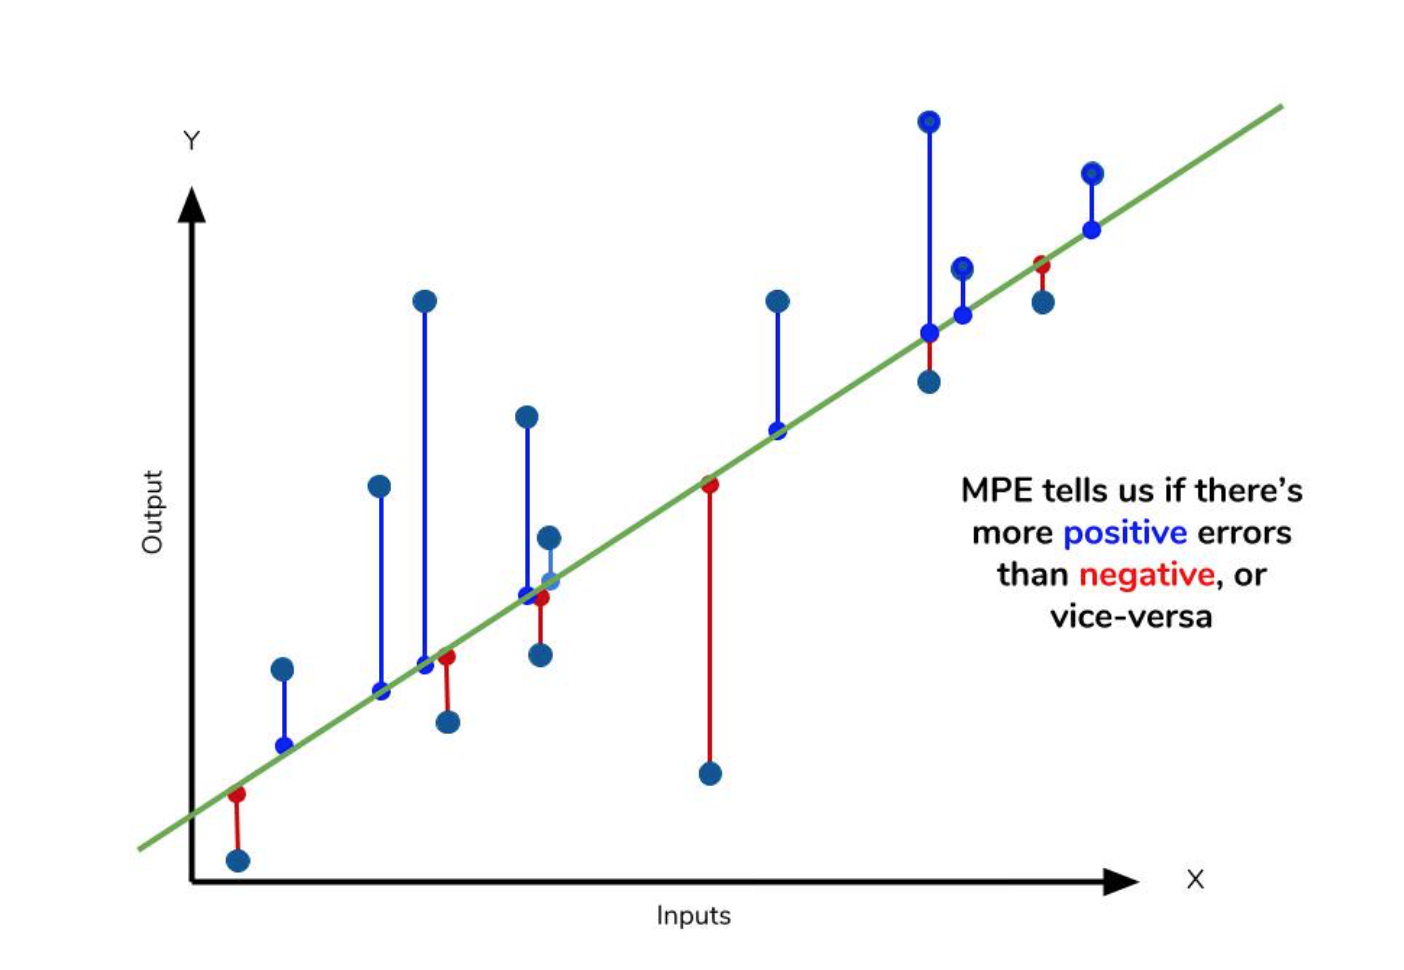

In [12]:
Image(filename='img/pic9.png', width= 600, height=250)

If you’re going to use a relative measure of error like MAPE or MPE rather than an absolute measure of error like MAE or MSE, you’ll most likely use MAPE. MAPE has the advantage of being easily interpretable, but you must be wary of data that will work against the calculation (i.e. zeroes). You can’t use MPE in the same way as MAPE, but it can tell you about systematic errors that your model makes.

All the other error metrics have suggested to us that, in general, the model did a fair job at predicting sales based off of critic and user score. However, the MPE indicates to us that it actually systematically underestimates the sales. Knowing this aspect about our model is helpful to us since it allows us to look back at the data and reiterate on which inputs to include that may improve our metrics. Overall, I would say that my assumptions in predicting sales was a good start. The error metrics revealed trends that would have been unclear or unseen otherwise.

In [14]:
# can find MAPE implementation in sklearn
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(mean_absolute_percentage_error(y_test, y_pred))

32.73809523809524


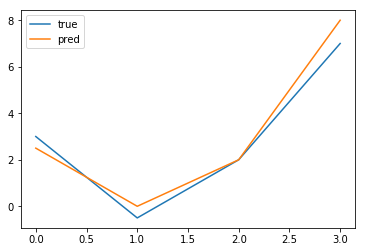

In [17]:
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(["true", "pred"])
plt.show()